In [54]:
from tensorflow.keras.layers import Input, Dense, Flatten,Dropout
from tensorflow.keras.models import Model


from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [55]:
train_path="C:/Users/HP/Documents/train"
test_path="C:/Users/HP/Documents/zip/a/New"
val_path="C:/Users/HP/Documents/val"
x_train=[]
for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
       
        
        

        x_train.append(img_arr)

x_test=[]

for folder in os.listdir(test_path):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))
        

        x_test.append(img_arr)

x_val=[]

for folder in os.listdir(val_path):

    sub_path=val_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))
        

        x_val.append(img_arr)

In [56]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)


train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

In [57]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [58]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 1096 images belonging to 2 classes.
Found 82 images belonging to 2 classes.
Found 281 images belonging to 2 classes.


In [59]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

In [60]:
training_set.class_indices

{'locust': 0, 'other': 1}

In [61]:
train_y.shape,test_y.shape,val_y.shape

((1096,), (82,), (281,))

In [62]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input



In [96]:
vgg = VGG19(input_shape=(224,224,3), weights='imagenet', include_top=False)

In [92]:
for layer in vgg.layers:
    layer.trainable = False

In [93]:
x = Flatten()(vgg.output)

In [66]:
#adding output layer.Softmax classifier is used as it is multi-class classification
prediction = Dense(2, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

In [67]:
# view the structure of the model
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [68]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [69]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model

In [70]:
# fit the model
history = model.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=10,
  callbacks=[early_stop],
  batch_size=32,shuffle=True)

Epoch 1/10
35/35 [==============================] - 752s 21s/step - loss: 0.5722 - accuracy: 0.7600 - val_loss: 0.1690 - val_accuracy: 0.9395
Epoch 2/10
35/35 [==============================] - 698s 20s/step - loss: 0.1796 - accuracy: 0.9325 - val_loss: 0.1577 - val_accuracy: 0.9537
Epoch 3/10
35/35 [==============================] - 701s 20s/step - loss: 0.1099 - accuracy: 0.9763 - val_loss: 0.1839 - val_accuracy: 0.9324
Epoch 4/10
35/35 [==============================] - 703s 20s/step - loss: 0.0776 - accuracy: 0.9808 - val_loss: 0.1510 - val_accuracy: 0.9537
Epoch 5/10
35/35 [==============================] - 743s 21s/step - loss: 0.0585 - accuracy: 0.9964 - val_loss: 0.1221 - val_accuracy: 0.9644
Epoch 6/10
35/35 [==============================] - 803s 23s/step - loss: 0.0425 - accuracy: 0.9973 - val_loss: 0.0975 - val_accuracy: 0.9609
Epoch 7/10
35/35 [==============================] - 736s 21s/step - loss: 0.0345 - accuracy: 0.9982 - val_loss: 0.1109 - val_accuracy: 0.9715
Epoch 

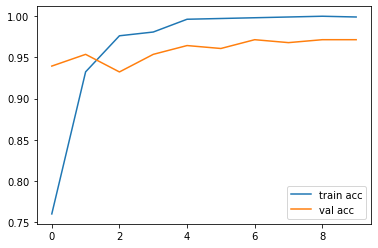

In [71]:
# accuracies

plt.plot(history.history['accuracy'], label='train acc')

plt.plot(history.history['val_accuracy'], label='val acc')

plt.legend()

plt.savefig('vgg-acc-rps-1.png')

plt.show()

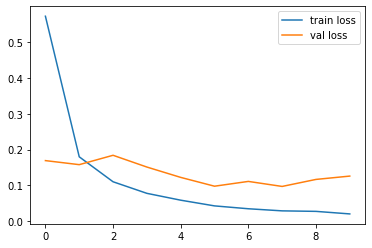

In [72]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('vgg-loss-rps-1.png')
plt.show()

In [97]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('vgg19.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpy479ny12\assets
